# Exercise 02

Estimate a regression using the Income data


## Forecast of income

We'll be working with a dataset from US Census indome ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

Many businesses would like to personalize their offer based on customer’s income. High-income customers could be, for instance, exposed to premium products. As a customer’s income is not always explicitly known, predictive model could estimate income of a person based on other information.

Our goal is to create a predictive model that will be able to output an estimation of a person income.

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
import zipfile
with zipfile.ZipFile('../datasets/income.csv.zip', 'r') as z:
    f = z.open('income.csv')
    income = pd.read_csv(f, index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [6]:
income.shape

(32561, 15)

# Exercise 2.1 

What is the relation between the age and Income?

For a one percent increase in the Age how much the income increases?

Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

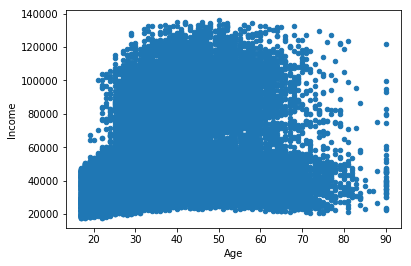

In [4]:
income.plot(x='Age', y='Income', kind='scatter')
plt.show()

# CARGA DE LIBRERIAS

In [5]:
#Carga de Librerias
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

# INCIALIZACIÓN DE LA REGRESIÓN

In [73]:
#Inicialización de la regresión
clf1 = LinearRegression(fit_intercept=True)

# ESTIMACIÓN DE LA REGRESIÓN

In [114]:
#Estimación del modelo
clf1.fit(income[["Age"]], income[["Income"]])

#Coeficientes
print(clf1.coef_)


[[542.16765707]]


# VALORES AJUSTADOS

In [115]:
#Valores ajustados
y_income_est = clf1.predict(income[["Age"]])

# REPRESENTACIÓN GRÁFICA DE LA REGRESIÓN

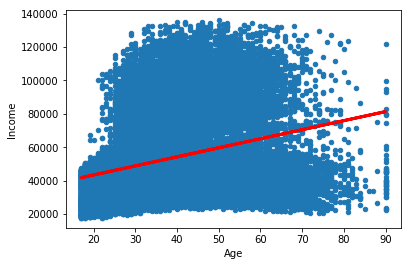

In [116]:
#Representación gráfica de la regresión
income.plot(x='Age', y='Income', kind='scatter')
plt.plot(income[["Age"]], y_income_est, color='red', linewidth=3)
plt.show()

# PREDICCIÓN PARA 30 AÑOS

In [118]:
# Predicción para 30 años
print(clf1.predict(30))


[[48803.11784304]]


# PREDICCIÓN PARA 40 AÑOS

In [119]:
# Predicción para 40 años
print(clf1.predict(40))

[[54224.79441376]]


# Exercise 2.2
Evaluate the model using the MSE

# CARGA DE LIBRERIAS

In [236]:
#Librerias
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

# SET DE DATOS

In [102]:
#Set de datos

X  = income[["Age"]]
y  = income[["Income"]]

#Definición de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# ESTIMACIÓN DEL MODELO

In [109]:
#Estimación del modelo
clf2      = LinearRegression(fit_intercept=True)
clf2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# PREDICCIÓN

In [110]:
#Predicción
y_predict = clf2.predict(X_test)

# EVALUACIÓN A TRAVÉS DEL MSE

In [237]:
#Evaluación a través del MSE
print('MSE:', metrics.mean_squared_error(y_test, y_predict))

MSE: 584771569.6943126



# Exercise 2.3

Run a regression model using as features the Age and Age$^2$ using the OLS equations

# SET DE DATOS

In [166]:
#Set de datos

X  = income[["Age"]]
y  = income[["Income"]]

# $AGE^2$

In [167]:
# Age^2
X  = np.c_[X, X**2]  
X

array([[  39, 1521],
       [  50, 2500],
       [  38, 1444],
       ...,
       [  58, 3364],
       [  22,  484],
       [  52, 2704]], dtype=int64)

# DEFINICIÓN DE TRAIN Y TEST

In [168]:
#Definición de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# ESTIMACIÓN DEL MODELO

In [169]:
#Estimación del modelo
clf3      = LinearRegression(fit_intercept=True)
clf3.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# COEFICIENTES ESTIMADOS PARA $AGE$ Y $AGE^2$

In [170]:
#Coeficientes estimados
clf3.coef_

array([[3146.06680598,  -30.65548675]])

# PREDICCIÓN

In [171]:
#Predicción
y_pred_age2 = clf3.predict(X_test)
y_pred_age2 

array([[60808.49719166],
       [30288.87109625],
       [43084.0372257 ],
       ...,
       [47648.01525004],
       [63087.69189223],
       [32300.6848924 ]])

# EVALUACIÓN A TRAVÉS DEL MSE

In [172]:
#Evaluación a través del MSE
print('MSE:', metrics.mean_squared_error(y_test, y_pred_age2))

MSE: 538693347.6338313


# Exercise 2.4


Estimate a regression using more features.

How is the performance compared to using only the Age?

# PREDICTORES X

In [229]:
X_m = pd.DataFrame(income, columns=['Age', 'Education-Num', 'Hours per week',"Capital Gain"])

y   = income[["Income"]]

X_m.head()


,Age,Education-Num,Hours per week,Capital Gain
0,39,13,40,2174
1,50,13,13,0
2,38,9,40,0
3,53,7,40,0
4,28,13,40,0


# DEFINICIÓN DE TRAIN Y TEST

In [230]:
X_mtrain, X_mtest, y_mtrain, y_mtest = train_test_split(X_m, y, random_state=1)

# ESTIMACIÓN DEL MODELO

In [231]:
# ESTIMACIÓN DEL MODELO
clf4      = LinearRegression(fit_intercept=True)
clf4.fit(X_mtrain, y_mtrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# COEFICIENTES ESTIMADOS MODELO MÚLTIPLE

In [233]:
#Coeficientes estimados
clf4.coef_

array([[4.72241837e+02, 3.73049519e+03, 4.24969533e+02, 4.60162943e-01]])

# PREDICCIÓN

In [234]:
#Predicción
y_pred_mul = clf4.predict(X_mtest)
y_pred_mul

array([[52330.11616181],
       [25319.21004164],
       [74437.52673553],
       ...,
       [40146.66659418],
       [51905.27300636],
       [43357.48043628]])

# EVALUACIÓN A TRAVÉS DEL MSE

### Modelo Múltiple

In [235]:
#Evaluación a través del MSE modelo múltiple
print('MSE:', metrics.mean_squared_error(y_mtest, y_pred_mul))

MSE: 439144447.9254539


### Modelo Simple

In [238]:
#Evaluación a través del MSE modelo simple
print('MSE:', metrics.mean_squared_error(y_test, y_predict))

MSE: 584771569.6943126


# Exercise 2.5


Estimate a logistic regression to predict if a person is in the United States.

What is the performance of the model

In [240]:
income['isUS'] = (income['Country'] == 'United-States')*1.0
income['isUS'].value_counts()

1.0    29170
0.0     3391
Name: isUS, dtype: int64

# EXPLORACIÓN DE VARIABLES

In [256]:
X_bin = income['Age']
Y_bin = income['isUS']

# GRÁFICO AGE VS isUS

Text(0,0.5,'isUS')

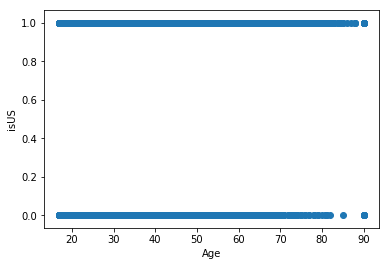

In [257]:
plt.scatter(X_bin, Y_bin)
plt.xlabel('Age')
plt.ylabel('isUS')

# SELECCIÓN DE PREDICTORES

In [260]:
X_bin = pd.DataFrame(income, columns=['Age', 'Education-Num', 'Hours per week',"Capital Gain"])
Y_bin = income['isUS']

Y_bin.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: isUS, dtype: float64

# CONJUNTO DE TRAIN Y TEST

In [267]:
X_bintrain, X_bintest, y_bintrain, y_bintest = train_test_split(X_bin, Y_bin, random_state=1)

# INICIALIZACIÓN Y ESTIMACIÓN DEL MODELO LOGÍSTICO

In [273]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_bintrain, y_bintrain)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

# COEFICIENTES DEL MODELO

In [279]:
logreg.coef_

array([[ 3.80609559e-03,  1.25980204e-01, -4.91025219e-03,
        -2.81356036e-06]])

# PREDICCIÓN USANDO EL CONJUNTO DE DATOS TEST

In [275]:
log_pred = logreg.predict(X_bintest)
log_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [277]:
log_pred_prob=logreg.predict_proba(X_bintest)[:, 1]
log_pred_prob

array([0.80114406, 0.85878716, 0.91580938, ..., 0.86939729, 0.88956683,
       0.89219357])

# CURVA ROC 

Text(0,0.5,'True Positive Rate (Sensitivity)')

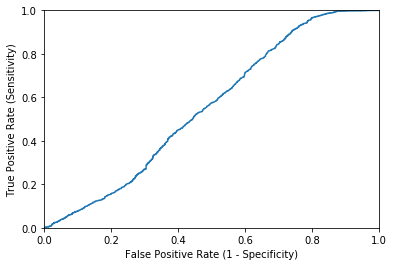

In [281]:
# plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_bintest, log_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

# AREA BAJO LA CURVA (AUC)

In [283]:
print(metrics.roc_auc_score(y_bintest, log_pred_prob))

0.5542555285726964
